In [1]:
import pandas as pd
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

## Importing Data

In [2]:
data_train = pd.read_csv('Data/train_set.csv')

/var/folders/sx/53qsrth94qs34_k0n9s4w_mh0000gn/T/ipykernel_33448/901962119.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data_train = pd.read_csv('Data/train_set.csv')


In [3]:
data_train.shape

(700000, 14)

In [4]:
data_train.head()

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127
1,46560345,32,9/17/2017 17:51,9/17/2017 18:23,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062
3,129547190,138,9/22/2019 11:27,9/22/2019 13:45,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311
4,136619463,14,1/31/2020 17:11,1/31/2020 17:25,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443


In [5]:
data_train['passholder_type'].value_counts(dropna=False)

passholder_type
Monthly Pass    394769
Walk-up         212426
One Day Pass     44455
Annual Pass      34092
Flex Pass        11604
NaN               2576
Testing             78
Name: count, dtype: int64

### Handling dates for EDA

In [6]:
def parse_dates(date):
    try:
        return pd.to_datetime(date, format='%Y-%m-%d %H:%M:%S')
    except ValueError:
        try:
            return pd.to_datetime(date, format='%m/%d/%Y %H:%M')
        except ValueError:
            return pd.NaT

In [7]:
data_train['start_time'] = data_train['start_time'].apply(parse_dates)
data_train['end_time'] = data_train['end_time'].apply(parse_dates)

In [8]:
min_year_train = data_train['start_time'].dt.year.min()
max_year_train = data_train['start_time'].dt.year.max()
min_year_end_train = data_train['end_time'].dt.year.min()
max_year_end_train = data_train['end_time'].dt.year.max()

In [9]:
print(f"Año mínimo inicio en train: {min_year_train}")
print(f"Año máximo inicio en train: {max_year_train}")
print(f"Año mínimo fin en train: {min_year_end_train}")
print(f"Año máximo fin en train: {max_year_end_train}")

Año mínimo inicio en train: 2016
Año máximo inicio en train: 2021
Año mínimo fin en train: 2016
Año máximo fin en train: 2022


In [10]:
data_train['duration_calculated'] = (data_train['end_time'] - data_train['start_time']).dt.total_seconds() / 60

In [11]:
data_train['plan_duration'].value_counts(dropna=False)

plan_duration
30.0     399178
1.0      184556
0.0       63275
365.0     52545
NaN         208
150.0       160
999.0        78
Name: count, dtype: int64

In [12]:
data_train['duration'].describe()

count    700000.000000
mean         37.084979
std         125.302510
min           1.000000
25%           7.000000
50%          13.000000
75%          26.000000
max        1440.000000
Name: duration, dtype: float64

### Duración de los viajes

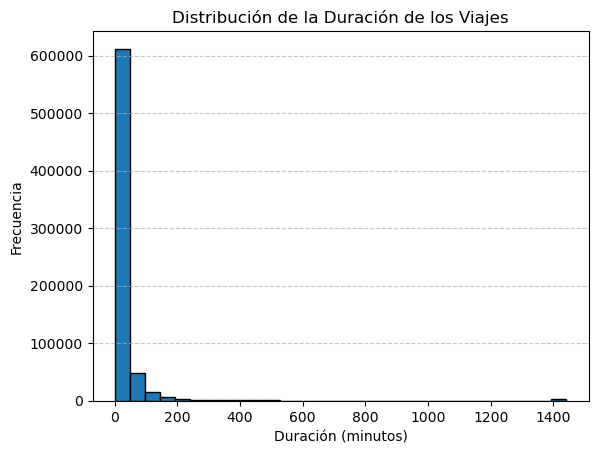

In [13]:
# Crear el histograma
plt.hist(data_train['duration'], bins=30, edgecolor='black')

# Personalizar el gráfico
plt.title('Distribución de la Duración de los Viajes')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

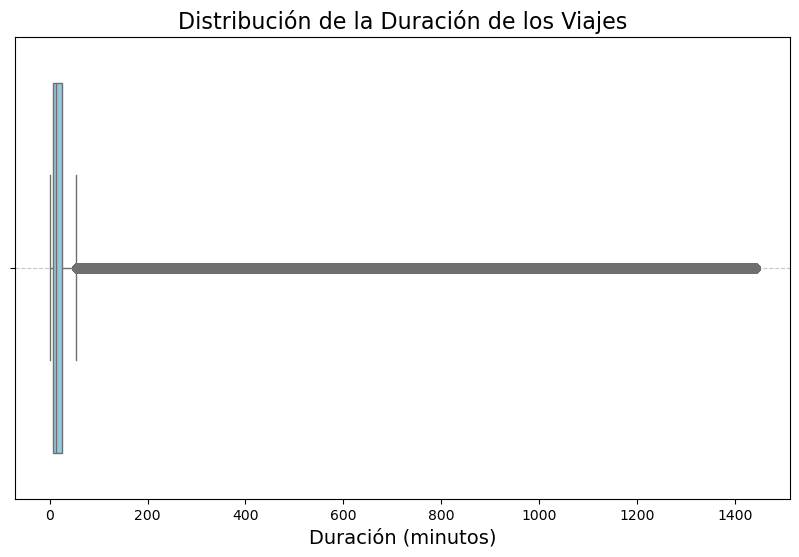

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_train, x='duration', color='skyblue')

# Personalizar el gráfico
plt.title('Distribución de la Duración de los Viajes', fontsize=16)
plt.xlabel('Duración (minutos)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

### Saturacion del servicio

In [15]:
start_station_demand = data_train.groupby(['start_station', 'passholder_type']).size().reset_index(name='trip_count')
end_station_demand = data_train.groupby(['end_station', 'passholder_type']).size().reset_index(name='trip_count')
top_start_stations = start_station_demand.sort_values(by='trip_count', ascending=False).head(10)
top_end_stations = start_station_demand.sort_values(by='trip_count', ascending=False).head(10)

In [16]:
data_train.groupby('passholder_type', dropna=False)[['trip_id']].count()

,trip_id
passholder_type,
Annual Pass,34092
Flex Pass,11604
Monthly Pass,394769
One Day Pass,44455
Testing,78
Walk-up,212426
NaN,2576


In [17]:
top_start_stations

,start_station,passholder_type,trip_count
8,3005,Monthly Pass,20709
111,3030,Monthly Pass,16058
561,4214,Walk-up,13595
46,3014,Monthly Pass,13324
116,3031,Monthly Pass,12451
249,3064,Monthly Pass,10902
136,3035,Monthly Pass,10824
542,4210,Walk-up,10454
13,3006,Monthly Pass,8982
264,3067,Monthly Pass,8672


In [18]:
top_end_stations

,start_station,passholder_type,trip_count
8,3005,Monthly Pass,20709
111,3030,Monthly Pass,16058
561,4214,Walk-up,13595
46,3014,Monthly Pass,13324
116,3031,Monthly Pass,12451
249,3064,Monthly Pass,10902
136,3035,Monthly Pass,10824
542,4210,Walk-up,10454
13,3006,Monthly Pass,8982
264,3067,Monthly Pass,8672


In [19]:
data_train['start_hour'] = data_train['start_time'].dt.hour
data_train['start_day'] = data_train['start_time'].dt.day_name()
hourly_demand = data_train.groupby(['start_hour', 'start_day', 'passholder_type']).size().reset_index(name='trip_count')

In [20]:
peak_hours = hourly_demand.sort_values(by='trip_count', ascending=False).head(10)

In [21]:
peak_hours

,start_hour,start_day,passholder_type,trip_count
655,17,Tuesday,Monthly Pass,6440
660,17,Wednesday,Monthly Pass,6334
650,17,Thursday,Monthly Pass,6273
635,17,Monday,Monthly Pass,6087
629,17,Friday,Monthly Pass,5566
693,18,Tuesday,Monthly Pass,5370
687,18,Thursday,Monthly Pass,5323
699,18,Wednesday,Monthly Pass,5300
613,16,Thursday,Monthly Pass,5219
618,16,Tuesday,Monthly Pass,5203


### Top 10 de estaciones iniciales según demanda y según su plan

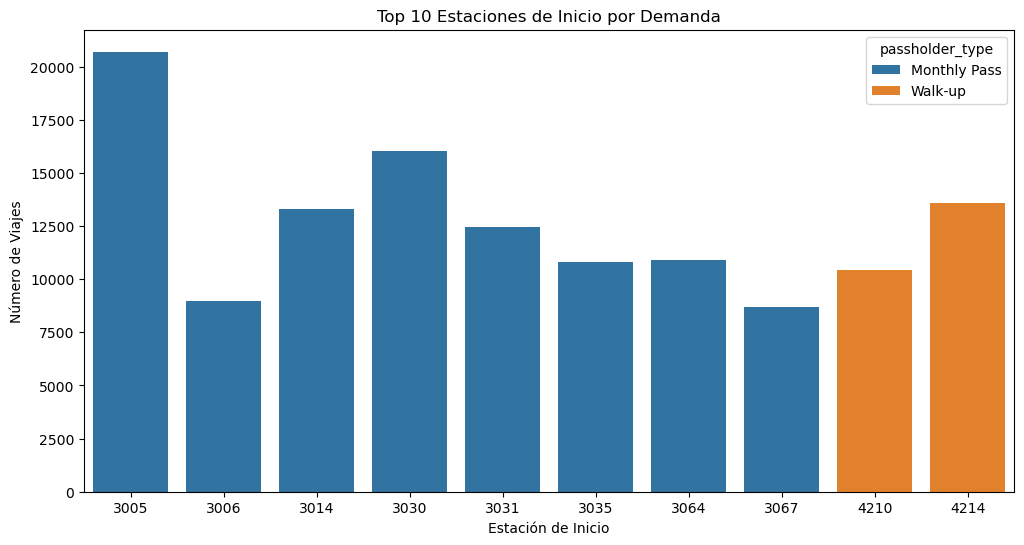

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=start_station_demand.sort_values(by='trip_count', ascending=False).head(10),
            x='start_station', y='trip_count', hue='passholder_type')
plt.title('Top 10 Estaciones de Inicio por Demanda')
plt.xlabel('Estación de Inicio')
plt.ylabel('Número de Viajes')
plt.show()

### Demanda por hora y tipo de plan

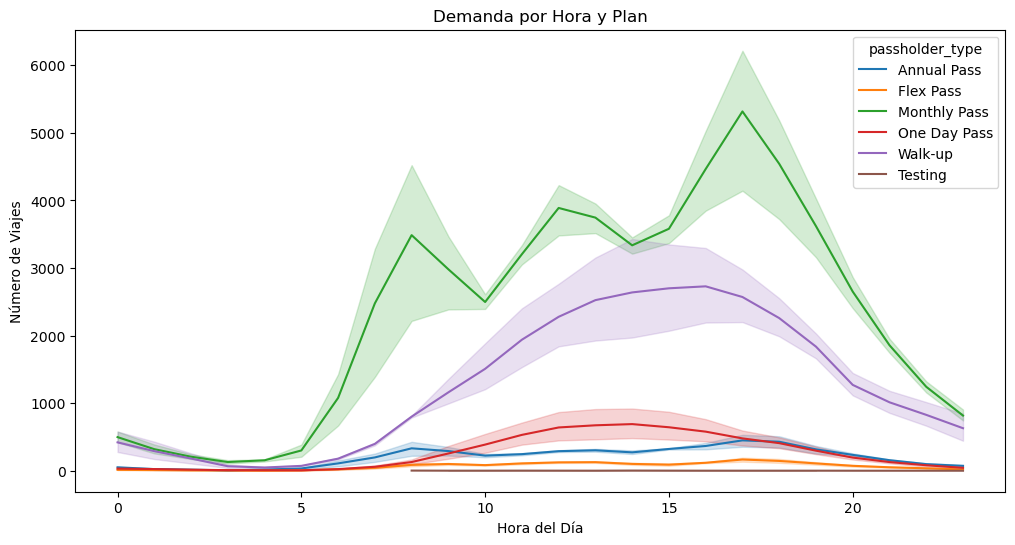

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_demand, x='start_hour', y='trip_count', hue='passholder_type')
plt.title('Demanda por Hora y Plan')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Viajes')
plt.show()

### Creando franjas horarias

In [24]:
bins = [0, 6, 12, 18, 24]
labels = ['Madrugada', 'Mañana', 'Tarde', 'Noche']

In [25]:
data_train['time_slot'] = pd.cut(data_train['start_hour'], bins=bins, labels=labels, right=False)

In [26]:
station_demand = data_train.groupby(['start_day', 'time_slot', 'start_station']).size().reset_index(name='trip_count')

/var/folders/sx/53qsrth94qs34_k0n9s4w_mh0000gn/T/ipykernel_33448/1747038755.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station_demand = data_train.groupby(['start_day', 'time_slot', 'start_station']).size().reset_index(name='trip_count')


In [27]:
station_demand = station_demand.sort_values(['start_day', 'time_slot', 'trip_count'], ascending=[True, True, False])

In [28]:
station_demand

,start_day,time_slot,start_station,trip_count
1,Friday,Madrugada,3005,163
40,Friday,Madrugada,3052,133
9,Friday,Madrugada,3014,118
65,Friday,Madrugada,3082,97
4,Friday,Madrugada,3008,96
...,...,...,...,...
10141,Wednesday,Noche,4529,0
10143,Wednesday,Noche,4536,0
10148,Wednesday,Noche,4541,0
10190,Wednesday,Noche,4593,0


In [29]:
result = (
    station_demand.groupby(['start_day', 'time_slot'])
    .apply(lambda group: [
        {'station': row['start_station'], 'trip_count': row['trip_count']}
        for _, row in group.head(5).iterrows()
    ])
    .reset_index(name='top_5_stations')
)

/var/folders/sx/53qsrth94qs34_k0n9s4w_mh0000gn/T/ipykernel_33448/2548252214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station_demand.groupby(['start_day', 'time_slot'])
/var/folders/sx/53qsrth94qs34_k0n9s4w_mh0000gn/T/ipykernel_33448/2548252214.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: [


In [30]:
result

,start_day,time_slot,top_5_stations
0,Friday,Madrugada,"[{'station': 3005, 'trip_count': 163}, {'stati..."
1,Friday,Mañana,"[{'station': 3014, 'trip_count': 1833}, {'stat..."
2,Friday,Tarde,"[{'station': 3030, 'trip_count': 2147}, {'stat..."
3,Friday,Noche,"[{'station': 3005, 'trip_count': 1509}, {'stat..."
4,Monday,Madrugada,"[{'station': 3005, 'trip_count': 110}, {'stati..."
5,Monday,Mañana,"[{'station': 3014, 'trip_count': 2008}, {'stat..."
6,Monday,Tarde,"[{'station': 3030, 'trip_count': 2186}, {'stat..."
7,Monday,Noche,"[{'station': 3005, 'trip_count': 1604}, {'stat..."
8,Saturday,Madrugada,"[{'station': 3005, 'trip_count': 211}, {'stati..."
9,Saturday,Mañana,"[{'station': 3005, 'trip_count': 603}, {'stati..."


In [31]:
total_trips = (
    station_demand.groupby(['start_day', 'time_slot'])['trip_count']
    .sum()
    .reset_index(name='total_trips')
)

/var/folders/sx/53qsrth94qs34_k0n9s4w_mh0000gn/T/ipykernel_33448/1348931868.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  station_demand.groupby(['start_day', 'time_slot'])['trip_count']


In [32]:
result_with_totals = pd.merge(result, total_trips, on=['start_day', 'time_slot'], how='left')

In [33]:
result_with_totals

,start_day,time_slot,top_5_stations,total_trips
0,Friday,Madrugada,"[{'station': 3005, 'trip_count': 163}, {'stati...",2940
1,Friday,Mañana,"[{'station': 3014, 'trip_count': 1833}, {'stat...",27165
2,Friday,Tarde,"[{'station': 3030, 'trip_count': 2147}, {'stat...",47600
3,Friday,Noche,"[{'station': 3005, 'trip_count': 1509}, {'stat...",27864
4,Monday,Madrugada,"[{'station': 3005, 'trip_count': 110}, {'stati...",2465
5,Monday,Mañana,"[{'station': 3014, 'trip_count': 2008}, {'stat...",25043
6,Monday,Tarde,"[{'station': 3030, 'trip_count': 2186}, {'stat...",43081
7,Monday,Noche,"[{'station': 3005, 'trip_count': 1604}, {'stat...",24437
8,Saturday,Madrugada,"[{'station': 3005, 'trip_count': 211}, {'stati...",4067
9,Saturday,Mañana,"[{'station': 3005, 'trip_count': 603}, {'stati...",20243


In [34]:
expanded_data = result.explode('top_5_stations')

In [35]:
expanded_data

,start_day,time_slot,top_5_stations
0,Friday,Madrugada,"{'station': 3005, 'trip_count': 163}"
0,Friday,Madrugada,"{'station': 3052, 'trip_count': 133}"
0,Friday,Madrugada,"{'station': 3014, 'trip_count': 118}"
0,Friday,Madrugada,"{'station': 3082, 'trip_count': 97}"
0,Friday,Madrugada,"{'station': 3008, 'trip_count': 96}"
...,...,...,...
27,Wednesday,Noche,"{'station': 3005, 'trip_count': 1617}"
27,Wednesday,Noche,"{'station': 3035, 'trip_count': 720}"
27,Wednesday,Noche,"{'station': 3064, 'trip_count': 698}"
27,Wednesday,Noche,"{'station': 3006, 'trip_count': 650}"


In [36]:
top_10_stations = top_start_stations['start_station'].unique().tolist()

In [37]:
top_10_stations

[3005, 3030, 4214, 3014, 3031, 3064, 3035, 4210, 3006, 3067]

In [38]:
expanded_data['station'] = expanded_data['top_5_stations'].apply(lambda x: x['station'] if pd.notna(x) else None)
expanded_data['trip_count'] = expanded_data['top_5_stations'].apply(lambda x: x['trip_count'] if pd.notna(x) else None)

In [39]:
expanded_data_filtered = expanded_data[expanded_data['station'].isin(top_10_stations)]

### Top de estaciones con mayor demnda por franja horaria

/var/folders/sx/53qsrth94qs34_k0n9s4w_mh0000gn/T/ipykernel_33448/691751223.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


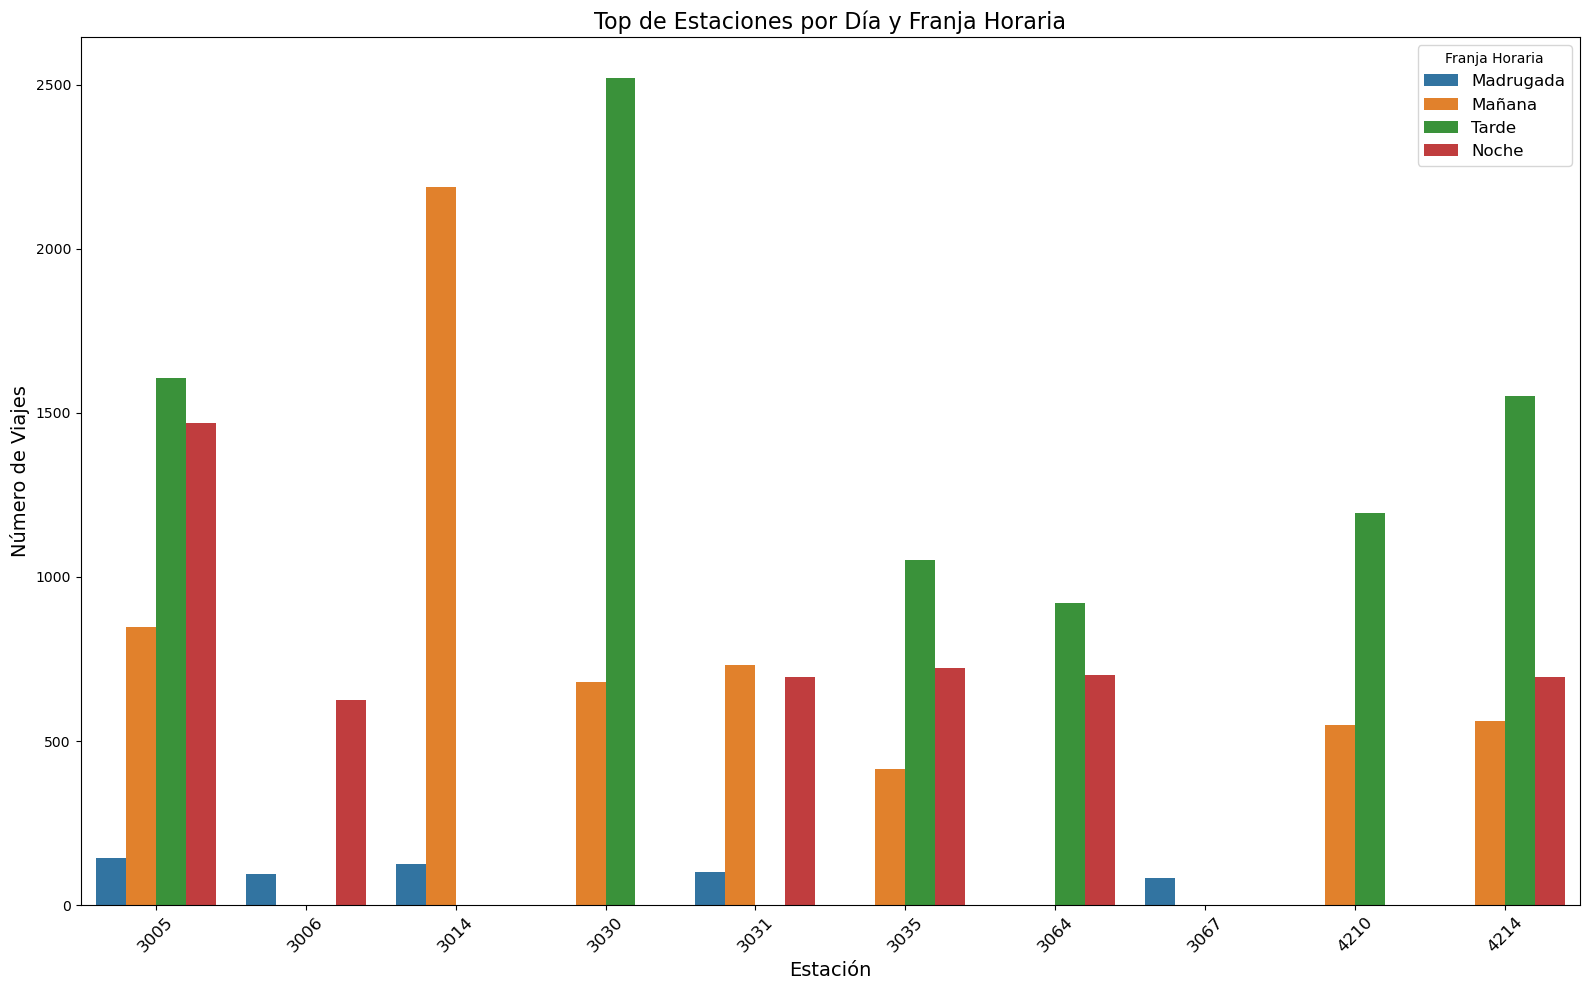

In [40]:
# Configurar el gráfico
plt.figure(figsize=(16, 10))

# Crear el gráfico de barras
sns.barplot(
    data=expanded_data_filtered,
    x='station',
    y='trip_count',
    hue='time_slot',
    ci=None,
    dodge=True
)

# Personalizar el gráfico
plt.title('Top de Estaciones por Día y Franja Horaria', fontsize=16)
plt.xlabel('Estación', fontsize=14)
plt.ylabel('Número de Viajes', fontsize=14)
plt.legend(title='Franja Horaria', fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

In [41]:
station_demand

,start_day,time_slot,start_station,trip_count
1,Friday,Madrugada,3005,163
40,Friday,Madrugada,3052,133
9,Friday,Madrugada,3014,118
65,Friday,Madrugada,3082,97
4,Friday,Madrugada,3008,96
...,...,...,...,...
10141,Wednesday,Noche,4529,0
10143,Wednesday,Noche,4536,0
10148,Wednesday,Noche,4541,0
10190,Wednesday,Noche,4593,0


### Top 5 de estaciones por día

In [42]:
top_n = 5  # Cambia a 5 si quieres el top 5
top_stations_by_day = (
    station_demand.groupby(['start_day', 'start_station'])['trip_count']
    .sum()
    .reset_index()
    .sort_values(['start_day', 'trip_count'], ascending=[True, False])
    .groupby('start_day')
    .head(top_n)
)

In [43]:
top_stations_by_day['start_day'] = pd.Categorical(
    top_stations_by_day['start_day'], 
    categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ordered=True
)

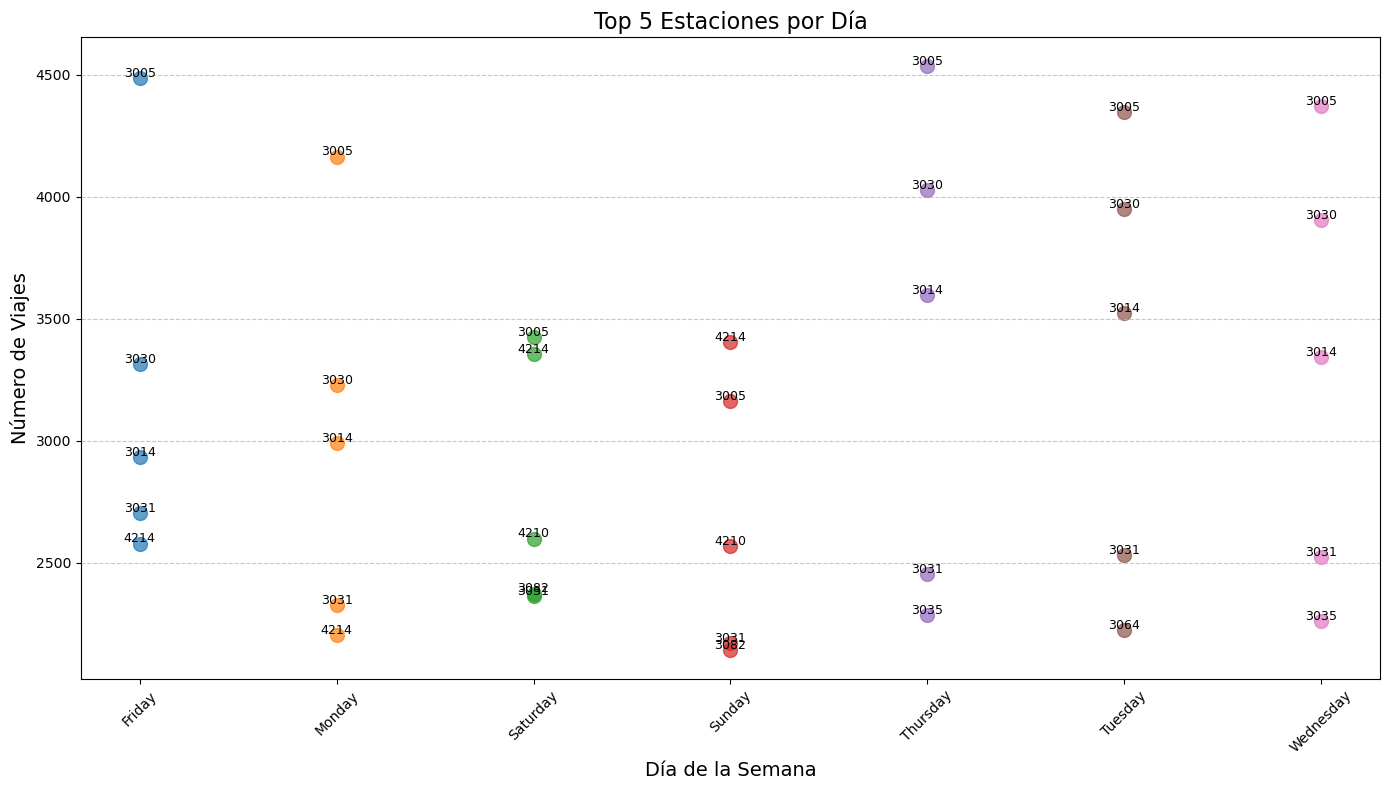

In [44]:
plt.figure(figsize=(14, 8))

# Dibujar los puntos para cada día
for day in top_stations_by_day['start_day'].unique():
    day_data = top_stations_by_day[top_stations_by_day['start_day'] == day]
    plt.scatter(
        day_data['start_day'], 
        day_data['trip_count'], 
        s=100, 
        alpha=0.7, 
        label=None  # Quitar la leyenda automática
    )
    # Añadir etiquetas de las estaciones
    for _, row in day_data.iterrows():
        plt.text(row['start_day'], row['trip_count'] + 5, str(row['start_station']), 
                 fontsize=9, ha='center', color='black')

# Personalizar el gráfico
plt.title(f'Top {top_n} Estaciones por Día', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=14)
plt.ylabel('Número de Viajes', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Crecimiento de los planes

In [45]:
data_train['year'] = data_train['start_time'].dt.year
data_train['month'] = data_train['start_time'].dt.month

In [46]:
usage_trend = data_train.groupby(['year', 'month']).size().reset_index(name='trip_count')

In [47]:
data_train.head()

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,start_station,end_station,duration_calculated,start_hour,start_day,time_slot,year,month
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,Round Trip,Walk-up,4127,4127,35.0,11,Tuesday,Mañana,2018,8
1,46560345,32,2017-09-17 17:51:00,2017-09-17 18:23:00,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,One Way,Walk-up,3057,3062,32.0,17,Sunday,Tarde,2017,9
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,One Way,Monthly Pass,3022,3062,6.0,9,Monday,Mañana,2019,4
3,129547190,138,2019-09-22 11:27:00,2019-09-22 13:45:00,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,One Way,One Day Pass,4304,4311,138.0,11,Sunday,Mañana,2019,9
4,136619463,14,2020-01-31 17:11:00,2020-01-31 17:25:00,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,One Way,Monthly Pass,4266,4443,14.0,17,Friday,Tarde,2020,1


In [48]:
data_train.dtypes

trip_id                         int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_lat                     float64
start_lon                     float64
end_lat                       float64
end_lon                       float64
bike_id                        object
plan_duration                 float64
trip_route_category            object
passholder_type                object
start_station                   int64
end_station                     int64
duration_calculated           float64
start_hour                      int32
start_day                      object
time_slot                    category
year                            int32
month                           int32
dtype: object

In [49]:
data_train['year_month'] = data_train['year'].astype(str) + '-' + data_train['month'].astype(str).str.zfill(2)

In [50]:
monthly_growth = data_train.groupby(['year_month', 'passholder_type']).size().reset_index(name='trip_count')

In [51]:
monthly_growth['year_month'] = pd.to_datetime(monthly_growth['year_month'], format='%Y-%m')
monthly_growth = monthly_growth.sort_values('year_month')

In [52]:
monthly_pivot = monthly_growth.pivot(index='year_month', columns='passholder_type', values='trip_count').fillna(0)

In [53]:
monthly_pivot

passholder_type,Annual Pass,Flex Pass,Monthly Pass,One Day Pass,Testing,Walk-up
year_month,,,,,,
2016-10-01,0.0,688.0,5933.0,0.0,0.0,3319.0
2016-11-01,0.0,507.0,5213.0,0.0,0.0,2206.0
2016-12-01,0.0,339.0,3951.0,0.0,0.0,1609.0
2017-01-01,0.0,370.0,3528.0,0.0,0.0,1815.0
2017-02-01,0.0,343.0,3398.0,0.0,0.0,1506.0
...,...,...,...,...,...,...
2021-07-01,1204.0,0.0,4390.0,1601.0,1.0,4355.0
2021-08-01,1144.0,0.0,4359.0,1391.0,0.0,4095.0
2021-10-01,1092.0,0.0,5031.0,1278.0,0.0,2971.0


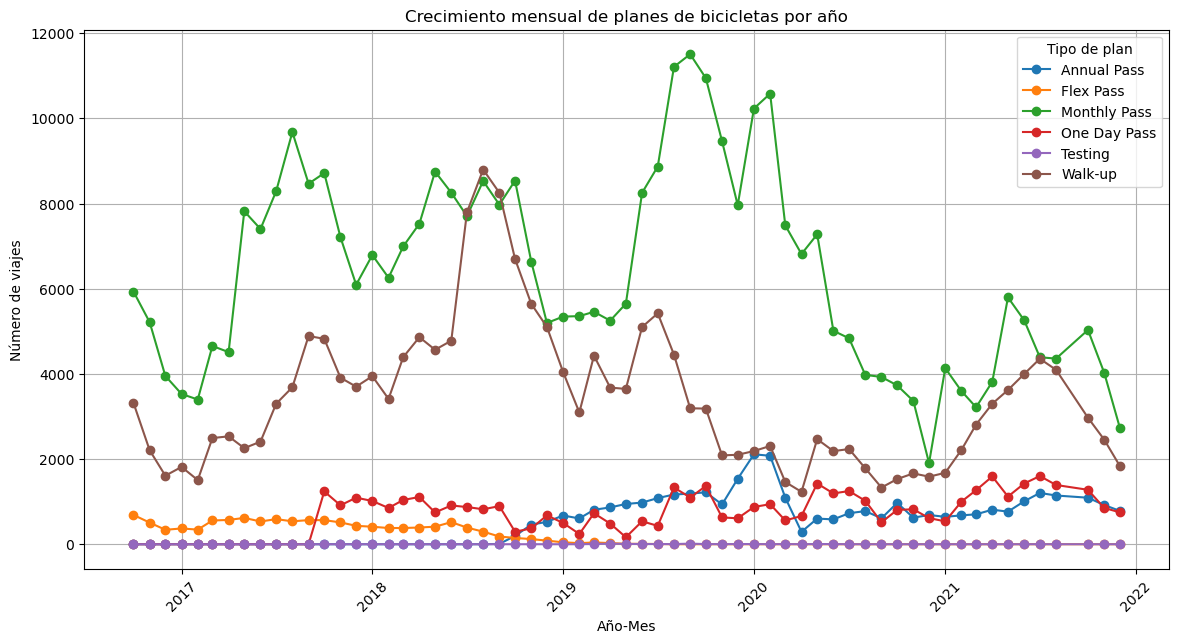

In [54]:
# Visualizar el crecimiento mensual absoluto
plt.figure(figsize=(14, 7))
for column in monthly_pivot.columns:
    plt.plot(monthly_pivot.index, monthly_pivot[column], marker='o', label=column)

plt.title('Crecimiento mensual de planes de bicicletas por año')
plt.xlabel('Año-Mes')
plt.ylabel('Número de viajes')
plt.legend(title='Tipo de plan')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [55]:
monthly_growth_pct = monthly_pivot.pct_change().fillna(0) * 100

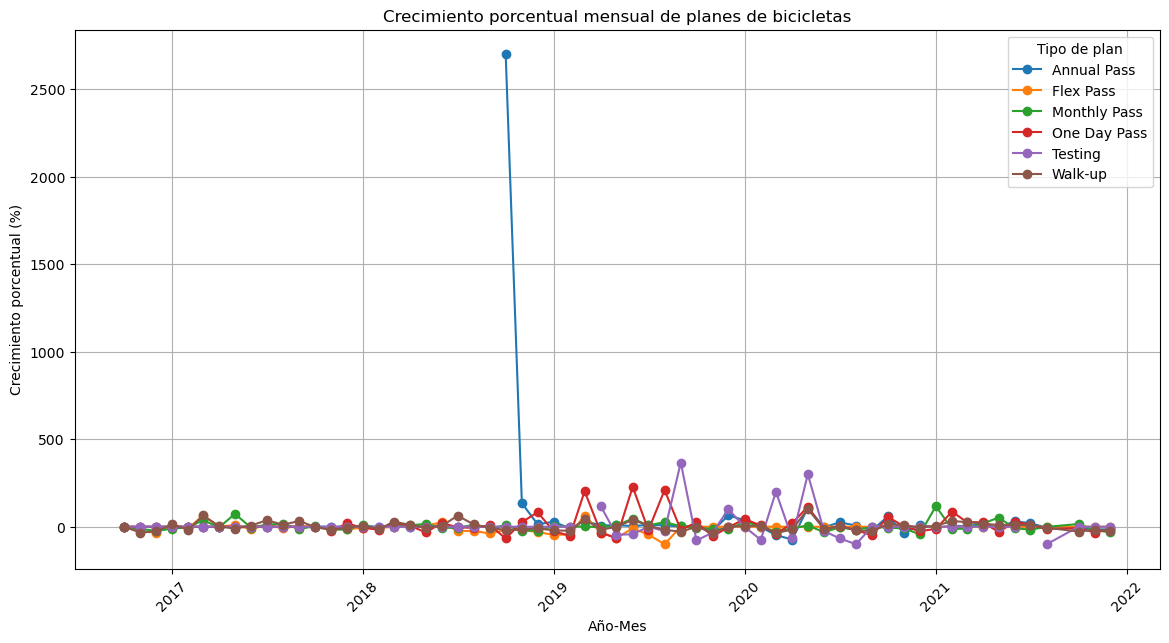

In [56]:
plt.figure(figsize=(14, 7))
for column in monthly_growth_pct.columns:
    plt.plot(monthly_growth_pct.index, monthly_growth_pct[column], marker='o', label=column)

plt.title('Crecimiento porcentual mensual de planes de bicicletas')
plt.xlabel('Año-Mes')
plt.ylabel('Crecimiento porcentual (%)')
plt.legend(title='Tipo de plan')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Pequeño modelo lineal para estimar crecimiento

In [57]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [58]:
monthly_pivot = monthly_pivot.reset_index()
monthly_pivot['time_index'] = np.arange(len(monthly_pivot))

In [59]:
# Proyectar para los próximos 3 meses
future_time_index = np.arange(len(monthly_pivot), len(monthly_pivot) + 3)
# Crear DataFrame para almacenar las proyecciones
future_projections_trend = {}

In [60]:
for plan in monthly_pivot.columns[1:-1]:  # Excluimos `year_month` y `time_index`
    # Extraer datos históricos
    X = monthly_pivot['time_index'].values.reshape(-1, 1)
    y = monthly_pivot[plan].values

    # Ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Hacer predicciones para los próximos 3 meses
    future_values = model.predict(future_time_index.reshape(-1, 1))
    future_projections_trend[plan] = future_values

In [61]:
projection_months_trend = pd.date_range(
    start=monthly_pivot['year_month'].iloc[-1] + pd.offsets.MonthBegin(1),
    periods=3,
    freq='MS'
)
projection_df_trend = pd.DataFrame(future_projections_trend, index=projection_months_trend)

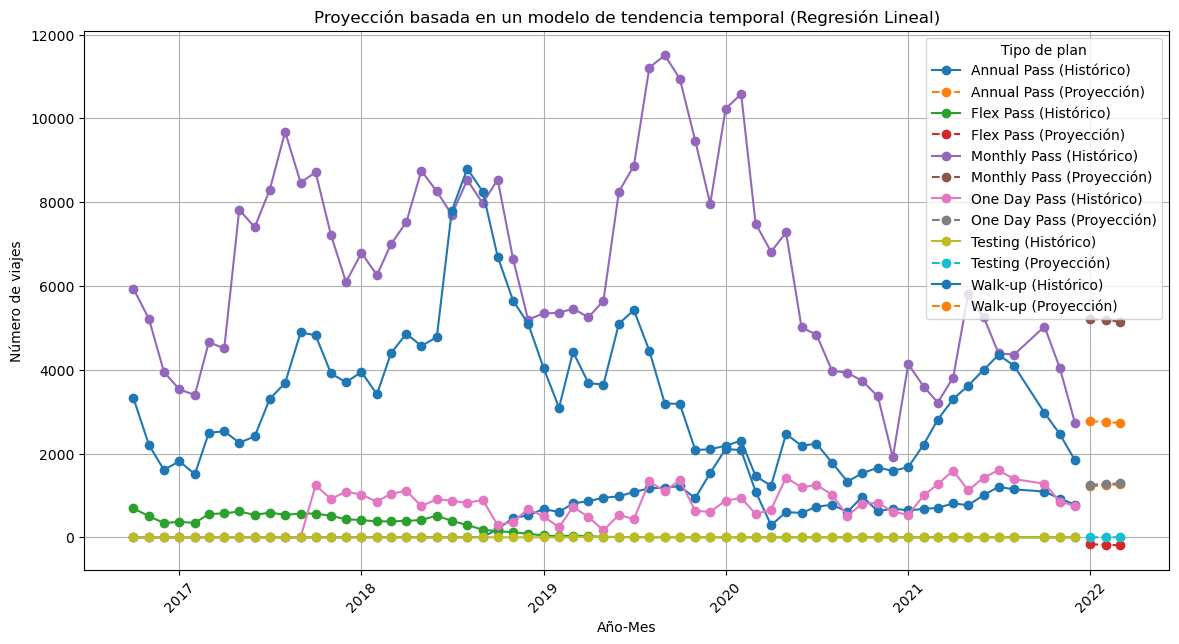

In [62]:
plt.figure(figsize=(14, 7))
for plan in monthly_pivot.columns[1:-1]:  # Excluimos `year_month` y `time_index`
    plt.plot(monthly_pivot['year_month'], monthly_pivot[plan], marker='o', label=f'{plan} (Histórico)')
    plt.plot(projection_df_trend.index, projection_df_trend[plan], linestyle='--', marker='o', label=f'{plan} (Proyección)')

plt.title('Proyección basada en un modelo de tendencia temporal (Regresión Lineal)')
plt.xlabel('Año-Mes')
plt.ylabel('Número de viajes')
plt.legend(title='Tipo de plan')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [63]:
projection_df_trend

,Annual Pass,Flex Pass,Monthly Pass,One Day Pass,Testing,Walk-up
2022-01-01,1218.845584,-166.312004,5220.382866,1254.413538,1.821259,2772.441565
2022-02-01,1240.082874,-177.533379,5183.974642,1271.473773,1.839138,2751.686510
2022-03-01,1261.320163,-188.754753,5147.566417,1288.534008,1.857017,2730.931455


### Cambios porcentuales

In [64]:
future_projections_trend_pct = {}

In [65]:
for plan in monthly_pivot.columns[1:-1]:  # Excluimos `year_month` y `time_index`
    # Extraer datos históricos
    X = monthly_pivot['time_index'].values.reshape(-1, 1)
    y = monthly_pivot[plan].values

    # Ajustar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X, y)

    # Hacer predicciones para los próximos 3 meses
    future_values = model.predict(future_time_index.reshape(-1, 1))

    # Calcular cambios porcentuales con respecto al último valor observado
    last_value = y[-1]
    future_pct_changes = [(fv - last_value) / last_value * 100 for fv in future_values]
    future_projections_trend_pct[plan] = future_pct_changes

/var/folders/sx/53qsrth94qs34_k0n9s4w_mh0000gn/T/ipykernel_33448/2346875033.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  future_pct_changes = [(fv - last_value) / last_value * 100 for fv in future_values]
/var/folders/sx/53qsrth94qs34_k0n9s4w_mh0000gn/T/ipykernel_33448/2346875033.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  future_pct_changes = [(fv - last_value) / last_value * 100 for fv in future_values]


In [66]:
projection_months_trend_pct = pd.date_range(
    start=monthly_pivot['year_month'].iloc[-1] + pd.offsets.MonthBegin(1),
    periods=3,
    freq='MS'
)
projection_df_trend_pct = pd.DataFrame(future_projections_trend_pct, index=projection_months_trend_pct)

In [67]:
print("Proyecciones en cambios porcentuales para los próximos 3 meses:")
print(projection_df_trend_pct)

Proyecciones en cambios porcentuales para los próximos 3 meses:
            Annual Pass  Flex Pass  Monthly Pass  One Day Pass  Testing  \
2022-01-01    55.663548       -inf     90.803467     67.478443      inf   
2022-02-01    58.375846       -inf     89.472757     69.756178      inf   
2022-03-01    61.088143       -inf     88.142047     72.033913      inf   

              Walk-up  
2022-01-01  50.840129  
2022-02-01  49.710909  
2022-03-01  48.581690  


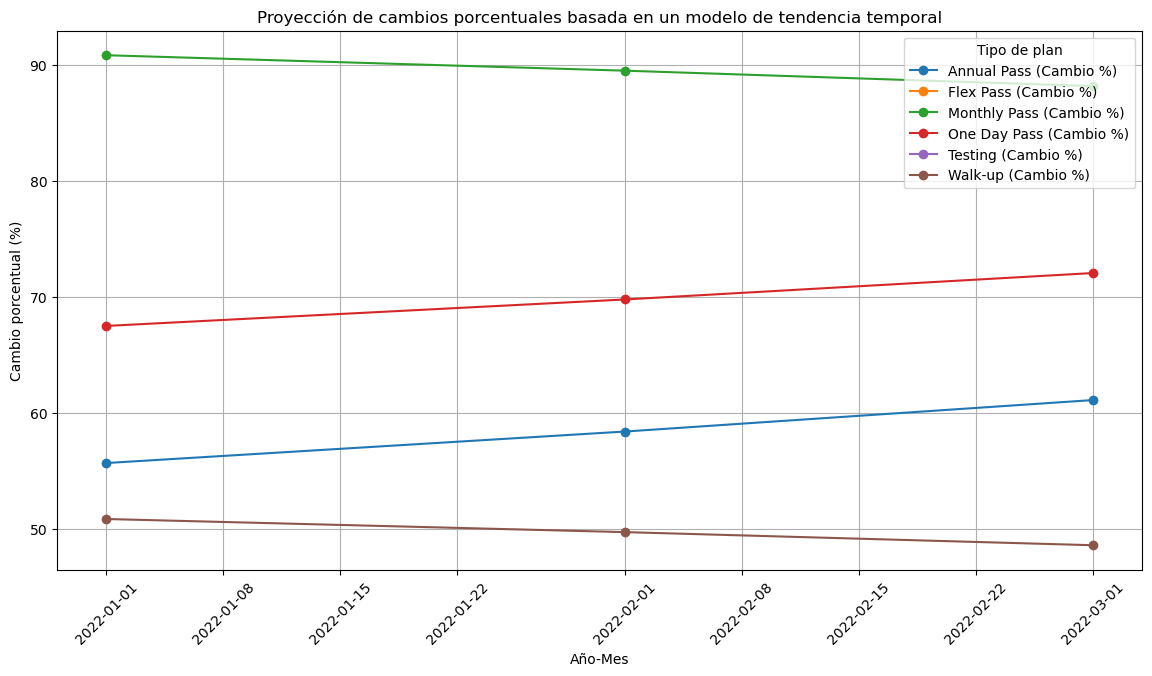

In [68]:
plt.figure(figsize=(14, 7))
for plan in future_projections_trend_pct.keys():
    plt.plot(projection_df_trend_pct.index, projection_df_trend_pct[plan], marker='o', label=f'{plan} (Cambio %)')

plt.title('Proyección de cambios porcentuales basada en un modelo de tendencia temporal')
plt.xlabel('Año-Mes')
plt.ylabel('Cambio porcentual (%)')
plt.legend(title='Tipo de plan')
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Balance de estaciones

In [69]:
outflows = data_train.groupby('start_station')['bike_id'].count().reset_index(name='outflows')
inflows = data_train.groupby('end_station')['bike_id'].count().reset_index(name='inflows')

In [70]:
balance_df = pd.merge(outflows, inflows, left_on='start_station', right_on='end_station', how='outer', suffixes=('_start', '_end'))

In [71]:
balance_df.fillna(0, inplace=True)
balance_df['balance'] = balance_df['inflows'] - balance_df['outflows']
balance_df.rename(columns={'start_station': 'station'}, inplace=True)

In [72]:
balance_df

,station,outflows,end_station,inflows,balance
0,3000.0,1138.0,3000,12347,11209.0
1,3005.0,28490.0,3005,30576,2086.0
2,3006.0,12645.0,3006,12807,162.0
3,3007.0,10774.0,3007,8681,-2093.0
4,3008.0,9051.0,3008,9341,290.0
...,...,...,...,...,...
364,4583.0,711.0,4583,655,-56.0
365,4584.0,48.0,4584,56,8.0
366,4587.0,356.0,4587,369,13.0
367,4593.0,30.0,4593,30,0.0


In [73]:
balance_df['balance'].describe()

count      369.000000
mean         0.000000
std        883.031682
min      -6845.000000
25%        -67.000000
50%         -8.000000
75%         20.000000
max      11209.000000
Name: balance, dtype: float64

### Observar distribución de las estaciones

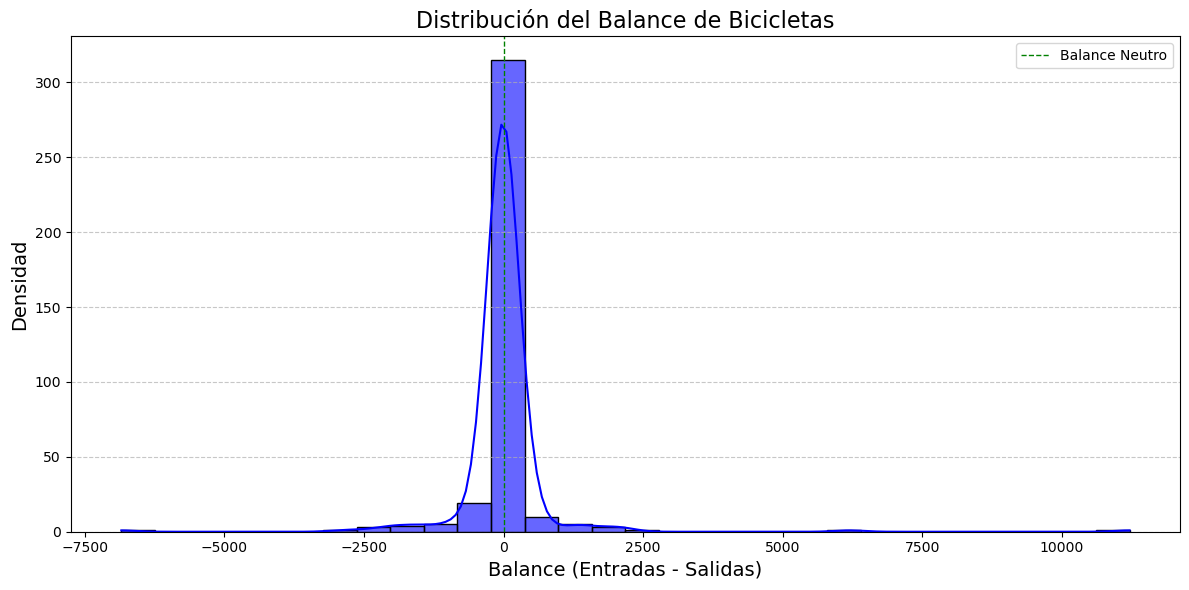

In [74]:
plt.figure(figsize=(12, 6))

# Crear el histograma y la línea de densidad
sns.histplot(balance_df['balance'], kde=True, bins=30, color='blue', alpha=0.6)

# Personalizar el gráfico
plt.title('Distribución del Balance de Bicicletas', fontsize=16)
plt.xlabel('Balance (Entradas - Salidas)', fontsize=14)
plt.ylabel('Densidad', fontsize=14)
plt.axvline(0, color='green', linestyle='--', linewidth=1, label='Balance Neutro')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [75]:
print(balance_df['balance'].quantile(.10))
print(balance_df['balance'].quantile(.90))

-190.79999999999998
194.59999999999985


In [76]:
treshold_high_demand = -191
treshold_low_demand = 195

In [77]:
high_d_stations = balance_df[balance_df['balance'] < treshold_high_demand]
low_d_stations = balance_df[balance_df['balance'] > treshold_low_demand]

### Revisar del top 10 de demanda qué necesita más atención

In [78]:
high_d_stations.head()

,station,outflows,end_station,inflows,balance
3,3007.0,10774.0,3007,8681,-2093.0
10,3016.0,5159.0,3016,4854,-305.0
16,3024.0,3326.0,3024,1667,-1659.0
18,3026.0,5728.0,3026,4633,-1095.0
19,3027.0,8535.0,3027,6996,-1539.0


In [79]:
hight_station_list = high_d_stations['end_station'].unique().tolist()

In [80]:
len(hight_station_list)

37

In [81]:
expanded_data_filtered.columns

Index(['start_day', 'time_slot', 'top_5_stations', 'station', 'trip_count'], dtype='object')

In [82]:
expanded_data_filtered.head()

,start_day,time_slot,top_5_stations,station,trip_count
0,Friday,Madrugada,"{'station': 3005, 'trip_count': 163}",3005,163
0,Friday,Madrugada,"{'station': 3014, 'trip_count': 118}",3014,118
1,Friday,Mañana,"{'station': 3014, 'trip_count': 1833}",3014,1833
1,Friday,Mañana,"{'station': 3005, 'trip_count': 1016}",3005,1016
1,Friday,Mañana,"{'station': 3031, 'trip_count': 839}",3031,839


In [83]:
expanded_data_filtered['station'].unique()

array([3005, 3014, 3031, 3030, 4214, 4210, 3035, 3064, 3006, 3067])

In [84]:
special_att = expanded_data_filtered[expanded_data_filtered['station'].isin(hight_station_list)]

In [85]:
special_att['station'].unique()

array([3030, 4214, 4210, 3067])

In [86]:
special_att.columns

Index(['start_day', 'time_slot', 'top_5_stations', 'station', 'trip_count'], dtype='object')

In [104]:
to_watch_trips = special_att.groupby('station')[['trip_count']].sum().reset_index()

In [105]:
to_watch_trips

,station,trip_count
0,3030,14645
1,3067,162
2,4210,8260
3,4214,13373


In [101]:
spec_att_high_d = high_d_stations[high_d_stations['end_station'].isin(special_att['station'].unique().tolist())]

In [102]:
spec_att_high_d

,station,outflows,end_station,inflows,balance
22,3030.0,20280.0,3030,17407,-2873.0
54,3067.0,11633.0,3067,10636,-997.0
120,4210.0,13379.0,4210,11960,-1419.0
124,4214.0,17466.0,4214,15010,-2456.0


In [106]:
to_watch_balance = spec_att_high_d[['end_station','balance']]

In [107]:
to_watch_balance

,end_station,balance
22,3030,-2873.0
54,3067,-997.0
120,4210,-1419.0
124,4214,-2456.0


In [ ]:
balance_df = pd.merge(outflows, inflows, left_on='start_station', right_on='end_station', how='outer', suffixes=('_start', '_end'))

In [89]:
data_train.dtypes

trip_id                         int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_lat                     float64
start_lon                     float64
end_lat                       float64
end_lon                       float64
bike_id                        object
plan_duration                 float64
trip_route_category            object
passholder_type                object
start_station                   int64
end_station                     int64
duration_calculated           float64
start_hour                      int32
start_day                      object
time_slot                    category
year                            int32
month                           int32
year_month                     object
dtype: object

In [109]:
merged_df = to_watch_trips.merge(
    to_watch_balance[['end_station', 'balance']],  # Seleccionamos solo las columnas necesarias
    left_on='station',  # Columna en el primer DataFrame
    right_on='end_station',    # Columna en el segundo DataFrame
    how='left'             # Realizamos un left join
)

In [110]:
merged_df

,station,trip_count,end_station,balance
0,3030,14645,3030,-2873.0
1,3067,162,3067,-997.0
2,4210,8260,4210,-1419.0
3,4214,13373,4214,-2456.0


In [117]:
merged_df

,station,trip_count,end_station,balance
0,3030,14645,3030,-2873.0
1,3067,162,3067,-997.0
2,4210,8260,4210,-1419.0
3,4214,13373,4214,-2456.0


In [116]:
xx = merged_df['station','trip_count', 'balance']

KeyError: ('station', 'trip_count', 'balance')

In [111]:
data_train.head()

,trip_id,duration,start_time,end_time,start_lat,start_lon,end_lat,end_lon,bike_id,plan_duration,...,passholder_type,start_station,end_station,duration_calculated,start_hour,start_day,time_slot,year,month,year_month
0,101750280,35,2018-08-07 11:20:00,2018-08-07 11:55:00,33.748920,-118.275192,33.748920,-118.275192,06530,1.0,...,Walk-up,4127,4127,35.0,11,Tuesday,Mañana,2018,8,2018-08
1,46560345,32,2017-09-17 17:51:00,2017-09-17 18:23:00,34.035679,-118.270813,34.047749,-118.243172,6683,0.0,...,Walk-up,3057,3062,32.0,17,Sunday,Tarde,2017,9,2017-09
2,120016336,6,2019-04-22 09:22:00,2019-04-22 09:28:00,34.046070,-118.233093,34.047749,-118.243172,06710,30.0,...,Monthly Pass,3022,3062,6.0,9,Monday,Mañana,2019,4,2019-04
3,129547190,138,2019-09-22 11:27:00,2019-09-22 13:45:00,34.062580,-118.290092,34.059689,-118.294662,17068,1.0,...,One Day Pass,4304,4311,138.0,11,Sunday,Mañana,2019,9,2019-09
4,136619463,14,2020-01-31 17:11:00,2020-01-31 17:25:00,34.026291,-118.277687,34.021660,-118.278687,18841,30.0,...,Monthly Pass,4266,4443,14.0,17,Friday,Tarde,2020,1,2020-01


In [113]:
data_train.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_lat',
       'start_lon', 'end_lat', 'end_lon', 'bike_id', 'plan_duration',
       'trip_route_category', 'passholder_type', 'start_station',
       'end_station', 'duration_calculated', 'start_hour', 'start_day',
       'time_slot', 'year', 'month', 'year_month'],
      dtype='object')